<a href="https://colab.research.google.com/github/patrikLM10/dl-ppg/blob/main/ABP_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: how to download dataset from kaggle

!pip install kaggle
!mkdir ~/.kaggle
!cp  kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mkachuee/BloodPressureDataset
!unzip BloodPressureDataset.zip -d /kaggle/input/BloodPressureDataset

Dataset URL: https://www.kaggle.com/datasets/mkachuee/BloodPressureDataset
License(s): unknown
100% 4.58G/4.60G [00:52<00:00, 42.0MB/s]
100% 4.60G/4.60G [00:52<00:00, 94.9MB/s]


In [7]:
import scipy.io
import numpy as np
import os
import zipfile # Import the zipfile module for programmatic unzipping

# Assuming the dataset was downloaded to the current directory as BloodPressureDataset.zip
zip_file_name = 'BloodPressureDataset.zip'
extracted_dir = 'BloodPressureDataset' # Directory to extract the files into

# Check if the zip file exists and extract it
if os.path.exists(zip_file_name):
    print(f"Unzipping {zip_file_name}...")
    with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
        zip_ref.extractall(extracted_dir)
    print("Unzipping complete.")
else:
    print(f"Zip file not found: {zip_file_name}. Please ensure it was downloaded correctly.")

# Load the dataset
# Update the data_path to point to the extracted directory
data_path = extracted_dir
file_path = os.path.join(data_path, 'part_1.mat') # Construct the full path to the file

# Check if the .mat file exists after extraction
if os.path.exists(file_path):
    print(f"Loading data from {file_path}")
    sample_mat = scipy.io.loadmat(file_path)['p']  # Load the mat file using the constructed path
    print("Data loaded successfully.")
else:
    print(f"Error: {file_path} not found after extraction. Please check the extracted contents.")

Unzipping BloodPressureDataset.zip...
Unzipping complete.
Loading data from BloodPressureDataset/part_1.mat
Data loaded successfully.


In [8]:
# Initialize lists to store PPG, ECG, and ABP signals
ppg, ecg, abp = [], [], []
sample_size = 250


In [9]:
# Split data into smaller samples
for i in range(1000):
    temp_mat = sample_mat[0, i]
    total_len = temp_mat.shape[1]
    for j in range(total_len // sample_size):
        ppg.append(temp_mat[0, j*sample_size:(j+1)*sample_size])
        abp.append(temp_mat[1, j*sample_size:(j+1)*sample_size])
        ecg.append(temp_mat[2, j*sample_size:(j+1)*sample_size])

ppg = np.array(ppg).reshape(-1, sample_size)
ecg = np.array(ecg).reshape(-1, sample_size)
abp = np.array(abp).reshape(-1, sample_size)

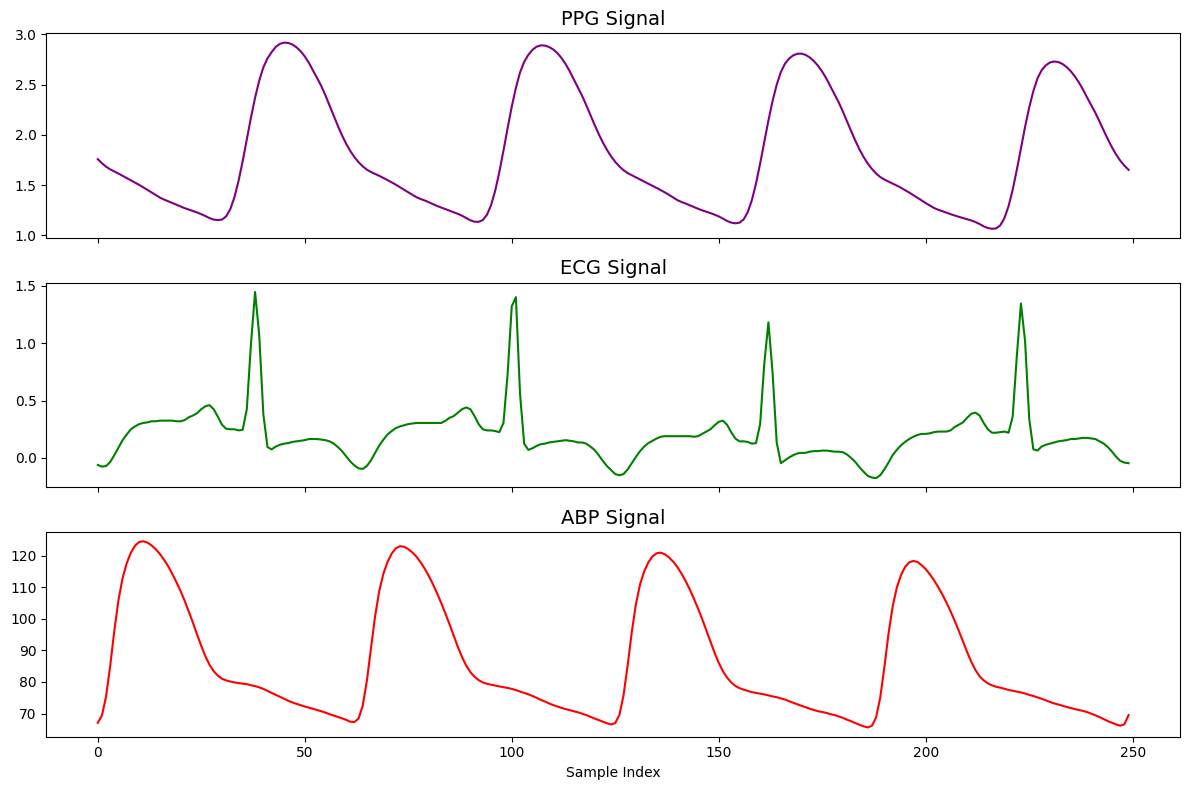

In [10]:
import matplotlib.pyplot as plt

# Plot PPG, ECG, and ABP signals
idx = 0
fig, ax = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

ax[0].plot(ppg[idx], color='purple')
ax[0].set_title("PPG Signal", fontsize=14)

ax[1].plot(ecg[idx], color='green')
ax[1].set_title("ECG Signal", fontsize=14)

ax[2].plot(abp[idx], color='red')
ax[2].set_title("ABP Signal", fontsize=14)

plt.xlabel("Sample Index")
plt.tight_layout()
plt.show()


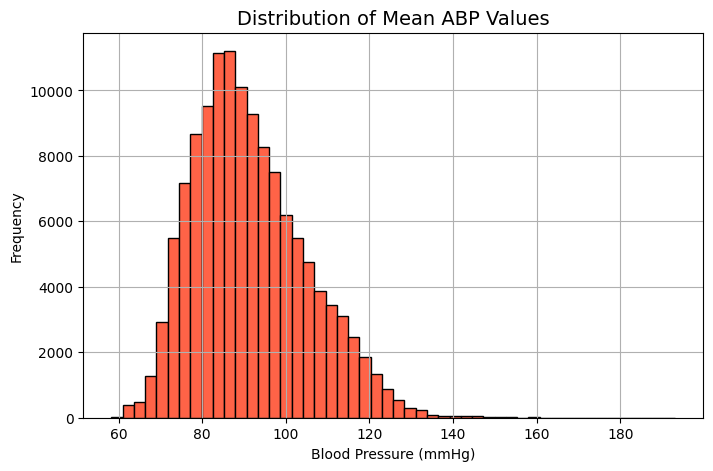

In [11]:
# Mean ABP values
abp_means = abp.mean(axis=1)

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(abp_means, bins=50, color='tomato', edgecolor='black')
plt.title("Distribution of Mean ABP Values", fontsize=14)
plt.xlabel("Blood Pressure (mmHg)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare the features and target variable
X = np.stack((ppg, ecg), axis=-1)
y = abp.mean(axis=1).reshape(-1, 1)


In [14]:
# Flatten the features
X_flat = X.reshape(X.shape[0], -1)

# Scale the features and target variable
scaler_X = StandardScaler().fit(X_flat)
X_scaled = scaler_X.transform(X_flat).reshape(X.shape)

scaler_y = StandardScaler().fit(y)
y_scaled = scaler_y.transform(y)


In [15]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

In [16]:
def CNN_LSTM_Model_256(input_shape):
    model = Sequential([
        layers.Conv1D(filters=256, kernel_size=5, activation='relu', input_shape=input_shape, padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        layers.Dropout(0.2),

        layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        layers.Dropout(0.2),

        layers.LSTM(256, return_sequences=False),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),

        layers.Dense(1, activation='linear')
    ])
    return model

# Build and compile the model
model = CNN_LSTM_Model(input_shape=(sample_size, 2))
model.compile(optimizer=Adam(learning_rate=5e-4), loss='mse', metrics=['mae'])

# Model Summary
model.summary()

NameError: name 'CNN_LSTM_Model' is not defined

In [20]:
# ✅ Full Corrected CNN-LSTM Code with 256 Filters

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

def CNN_LSTM_Model_256(input_shape):
    model = Sequential([
        # Convolutional Layer 1
        layers.Conv1D(filters=256, kernel_size=5, activation='relu', input_shape=input_shape, padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        layers.Dropout(0.2),

        # Convolutional Layer 2
        layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        layers.Dropout(0.2),

        # LSTM Layer
        layers.LSTM(256, return_sequences=False),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        # Fully Connected Layers
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),

        # Output Layer
        layers.Dense(1, activation='linear')  # For regression
    ])
    return model

# ✅ Replace with your actual input shape
sample_size = 100  # for exam_
model = CNN_LSTM_Model_256(input_shape=(sample_size, 2))

# Compile the model
model.compile(optimizer=Adam(learning_rate=5e-4), loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 100, 256)       │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 100, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 50, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 50, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 50, 128)        │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 50, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 256)            │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 598,401 (2.28 MB)

 Trainable params: 596,353 (2.27 MB)

 Non-trainable params: 2,048 (8.00 KB)

In [35]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, Dropout, BatchNormalization, Bidirectional, LSTM, Layer

from tensorflow.keras.layers import Layer, Dense
import tensorflow as tf

class Attention(Layer):
    def __init__(self):
        super(Attention, self).__init__()
        self.dense = Dense(1)  # Create once here!

    def call(self, inputs):
        # inputs: (batch_size, time_steps, features)
        score = tf.nn.tanh(self.dense(inputs))         # (batch_size, time_steps, 1)
        attention_weights = tf.nn.softmax(score, axis=1)  # (batch_size, time_steps, 1)
        context_vector = attention_weights * inputs
        context_vector = tf.reduce_sum(context_vector, axis=1)  # (batch_size, features)
        return context_vector


# Model Definition
def CNN_BiLSTM_Attention_Model(input_shape):
    inputs = Input(shape=input_shape)

    x = Conv1D(filters=256, kernel_size=5, activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.2)(x)

    x = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.2)(x)

    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = Attention()(x)

    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)

    outputs = Dense(1, activation='linear')(x)

    model = Model(inputs, outputs)
    return model

# Input shape
sample_size = 250  # Length of time series
num_features = 2   # Number of features per timestep

input_shape = (sample_size, num_features)
model = CNN_BiLSTM_Attention_Model(input_shape)

# Compile the model
model.compile(optimizer=Adam(learning_rate=5e-4), loss='mse', metrics=['mae'])

# Summary
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 250, 2)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 250, 256)       │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 250, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (None, 125, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 125, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 125, 128)       │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 125, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (None, 62, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 62, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 62, 256)        │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_2 (Attention)         │ (None, 256)            │           257 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 466,562 (1.78 MB)

 Trainable params: 465,026 (1.77 MB)

 Non-trainable params: 1,536 (6.00 KB)

In [36]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Define Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1),
    ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_loss", verbose=1)
]

# Fit the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=35,
    batch_size=64,
    callbacks=callbacks,  # 👈 Enable callbacks here
    verbose=1
)


Epoch 1/35
1401/1403 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.8617 - mae: 0.7127
Epoch 1: val_loss improved from inf to 0.51252, saving model to best_model.h5


1403/1403 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - loss: 0.8613 - mae: 0.7125 - val_loss: 0.5125 - val_mae: 0.5505 - learning_rate: 5.0000e-04
Epoch 2/35
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.4457 - mae: 0.5096
Epoch 2: val_loss improved from 0.51252 to 0.33395, saving model to best_model.h5


1403/1403 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - loss: 0.4456 - mae: 0.5096 - val_loss: 0.3340 - val_mae: 0.4211 - learning_rate: 5.0000e-04
Epoch 3/35
1401/1403 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.3507 - mae: 0.4466
Epoch 3: val_loss improved from 0.33395 to 0.28412, saving model to best_model.h5


1403/1403 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - loss: 0.3507 - mae: 0.4466 - val_loss: 0.2841 - val_mae: 0.3970 - learning_rate: 5.0000e-04
Epoch 4/35
1402/1403 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2860 - mae: 0.3998
Epoch 4: val_loss did not improve from 0.28412
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - loss: 0.2859 - mae: 0.3998 - val_loss: 0.2920 - val_mae: 0.4065 - learning_rate: 5.0000e-04
Epoch 5/35
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2455 - mae: 0.3679
Epoch 5: val_loss improved from 0.28412 to 0.20105, saving model to best_model.h5


1403/1403 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - loss: 0.2455 - mae: 0.3679 - val_loss: 0.2011 - val_mae: 0.3219 - learning_rate: 5.0000e-04
Epoch 6/35
1401/1403 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2228 - mae: 0.3486
Epoch 6: val_loss did not improve from 0.20105
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - loss: 0.2228 - mae: 0.3486 - val_loss: 0.2472 - val_mae: 0.3706 - learning_rate: 5.0000e-04
Epoch 7/35
1402/1403 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2031 - mae: 0.3314
Epoch 7: val_loss improved from 0.20105 to 0.17879, saving model to best_model.h5


1403/1403 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - loss: 0.2031 - mae: 0.3314 - val_loss: 0.1788 - val_mae: 0.2978 - learning_rate: 5.0000e-04
Epoch 8/35
1402/1403 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1934 - mae: 0.3204
Epoch 8: val_loss improved from 0.17879 to 0.16058, saving model to best_model.h5


1403/1403 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - loss: 0.1933 - mae: 0.3204 - val_loss: 0.1606 - val_mae: 0.2861 - learning_rate: 5.0000e-04
Epoch 9/35
1401/1403 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1795 - mae: 0.3102
Epoch 9: val_loss improved from 0.16058 to 0.14771, saving model to best_model.h5


1403/1403 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - loss: 0.1795 - mae: 0.3102 - val_loss: 0.1477 - val_mae: 0.2695 - learning_rate: 5.0000e-04
Epoch 10/35
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1661 - mae: 0.2968
Epoch 10: val_loss improved from 0.14771 to 0.14023, saving model to best_model.h5


1403/1403 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - loss: 0.1661 - mae: 0.2968 - val_loss: 0.1402 - val_mae: 0.2580 - learning_rate: 5.0000e-04
Epoch 11/35
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1557 - mae: 0.2868
Epoch 11: val_loss did not improve from 0.14023
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - loss: 0.1557 - mae: 0.2868 - val_loss: 0.1978 - val_mae: 0.3294 - learning_rate: 5.0000e-04
Epoch 12/35
1402/1403 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1501 - mae: 0.2830
Epoch 12: val_loss did not improve from 0.14023
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - loss: 0.1501 - mae: 0.2830 - val_loss: 0.1406 - val_mae: 0.2659 - learning_rate: 5.0000e-04
Epoch 13/35
1402/1403 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1419 - mae: 0.2757
Epoch 13: val_loss improved from 0.14023 to 0.12205, saving model to best_model.h5


1403/1403 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - loss: 0.1419 - mae: 0.2757 - val_loss: 0.1220 - val_mae: 0.2378 - learning_rate: 5.0000e-04
Epoch 14/35
1402/1403 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1390 - mae: 0.2710
Epoch 14: val_loss did not improve from 0.12205
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - loss: 0.1390 - mae: 0.2710 - val_loss: 0.1343 - val_mae: 0.2511 - learning_rate: 5.0000e-04
Epoch 15/35
1402/1403 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1341 - mae: 0.2668
Epoch 15: val_loss improved from 0.12205 to 0.12071, saving model to best_model.h5


1403/1403 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - loss: 0.1341 - mae: 0.2668 - val_loss: 0.1207 - val_mae: 0.2355 - learning_rate: 5.0000e-04
Epoch 16/35
1401/1403 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1313 - mae: 0.2634
Epoch 16: val_loss did not improve from 0.12071
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 47s 33ms/step - loss: 0.1313 - mae: 0.2634 - val_loss: 0.1279 - val_mae: 0.2397 - learning_rate: 5.0000e-04
Epoch 17/35
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1236 - mae: 0.2551
Epoch 17: val_loss improved from 0.12071 to 0.11286, saving model to best_model.h5


1403/1403 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - loss: 0.1236 - mae: 0.2551 - val_loss: 0.1129 - val_mae: 0.2258 - learning_rate: 5.0000e-04
Epoch 18/35
1401/1403 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1254 - mae: 0.2566
Epoch 18: val_loss did not improve from 0.11286
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - loss: 0.1254 - mae: 0.2566 - val_loss: 0.1204 - val_mae: 0.2373 - learning_rate: 5.0000e-04
Epoch 19/35
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1182 - mae: 0.2491
Epoch 19: val_loss did not improve from 0.11286
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - loss: 0.1182 - mae: 0.2491 - val_loss: 0.1140 - val_mae: 0.2267 - learning_rate: 5.0000e-04
Epoch 20/35
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1193 - mae: 0.2496
Epoch 20: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 20: val_loss did not improve from 0.11286
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - loss: 0.1193 - mae: 0.2496 - val_loss: 0.1186 - val_mae: 0.

1403/1403 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - loss: 0.1075 - mae: 0.2376 - val_loss: 0.0966 - val_mae: 0.2056 - learning_rate: 2.5000e-04
Epoch 22/35
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1004 - mae: 0.2311
Epoch 22: val_loss did not improve from 0.09663
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - loss: 0.1004 - mae: 0.2311 - val_loss: 0.0984 - val_mae: 0.2095 - learning_rate: 2.5000e-04
Epoch 23/35
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0985 - mae: 0.2285
Epoch 23: val_loss did not improve from 0.09663
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - loss: 0.0985 - mae: 0.2285 - val_loss: 0.0993 - val_mae: 0.2061 - learning_rate: 2.5000e-04
Epoch 24/35
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0994 - mae: 0.2289
Epoch 24: val_loss improved from 0.09663 to 0.09405, saving model to best_model.h5


1403/1403 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - loss: 0.0994 - mae: 0.2289 - val_loss: 0.0941 - val_mae: 0.1975 - learning_rate: 2.5000e-04
Epoch 25/35
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0922 - mae: 0.2199
Epoch 25: val_loss did not improve from 0.09405
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - loss: 0.0922 - mae: 0.2199 - val_loss: 0.1037 - val_mae: 0.2158 - learning_rate: 2.5000e-04
Epoch 26/35
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0930 - mae: 0.2234
Epoch 26: val_loss did not improve from 0.09405
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - loss: 0.0930 - mae: 0.2234 - val_loss: 0.1017 - val_mae: 0.2040 - learning_rate: 2.5000e-04
Epoch 27/35
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0921 - mae: 0.2205
Epoch 27: val_loss improved from 0.09405 to 0.09114, saving model to best_model.h5


1403/1403 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - loss: 0.0921 - mae: 0.2205 - val_loss: 0.0911 - val_mae: 0.1932 - learning_rate: 2.5000e-04
Epoch 28/35
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0894 - mae: 0.2188
Epoch 28: val_loss improved from 0.09114 to 0.09101, saving model to best_model.h5


1403/1403 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - loss: 0.0894 - mae: 0.2188 - val_loss: 0.0910 - val_mae: 0.1905 - learning_rate: 2.5000e-04
Epoch 29/35
1401/1403 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0895 - mae: 0.2188
Epoch 29: val_loss improved from 0.09101 to 0.09050, saving model to best_model.h5


1403/1403 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - loss: 0.0895 - mae: 0.2188 - val_loss: 0.0905 - val_mae: 0.1902 - learning_rate: 2.5000e-04
Epoch 30/35
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0894 - mae: 0.2176
Epoch 30: val_loss did not improve from 0.09050
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - loss: 0.0894 - mae: 0.2176 - val_loss: 0.0929 - val_mae: 0.1947 - learning_rate: 2.5000e-04
Epoch 31/35
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0856 - mae: 0.2154
Epoch 31: val_loss did not improve from 0.09050
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - loss: 0.0856 - mae: 0.2154 - val_loss: 0.0934 - val_mae: 0.1971 - learning_rate: 2.5000e-04
Epoch 32/35
1401/1403 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0874 - mae: 0.2157
Epoch 32: val_loss improved from 0.09050 to 0.08915, saving model to best_model.h5


1403/1403 ━━━━━━━━━━━━━━━━━━━━ 87s 33ms/step - loss: 0.0874 - mae: 0.2158 - val_loss: 0.0892 - val_mae: 0.1891 - learning_rate: 2.5000e-04
Epoch 33/35
1401/1403 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0890 - mae: 0.2185
Epoch 33: val_loss improved from 0.08915 to 0.08877, saving model to best_model.h5


1403/1403 ━━━━━━━━━━━━━━━━━━━━ 77s 29ms/step - loss: 0.0890 - mae: 0.2185 - val_loss: 0.0888 - val_mae: 0.1885 - learning_rate: 2.5000e-04
Epoch 34/35
1401/1403 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0878 - mae: 0.2158
Epoch 34: val_loss did not improve from 0.08877
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - loss: 0.0878 - mae: 0.2158 - val_loss: 0.0892 - val_mae: 0.1894 - learning_rate: 2.5000e-04
Epoch 35/35
1402/1403 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0846 - mae: 0.2119
Epoch 35: val_loss did not improve from 0.08877
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - loss: 0.0846 - mae: 0.2119 - val_loss: 0.0912 - val_mae: 0.1926 - learning_rate: 2.5000e-04


In [33]:
# Fit the model to the training data
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=35,
    batch_size=64,
    verbose=1
)

Epoch 1/35


ValueError: Exception encountered when calling Attention.call().

[1mtf.function only supports singleton tf.Variables created on the first call. Make sure the tf.Variable is only created once or created outside tf.function. See https://www.tensorflow.org/guide/function#creating_tfvariables for more information.[0m

Arguments received by Attention.call():
  • inputs=tf.Tensor(shape=(None, 62, 256), dtype=float32)

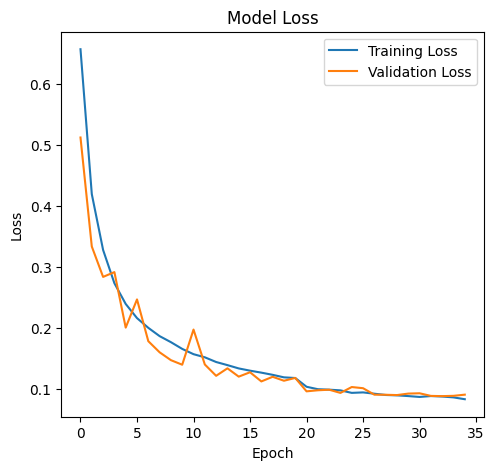

In [37]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

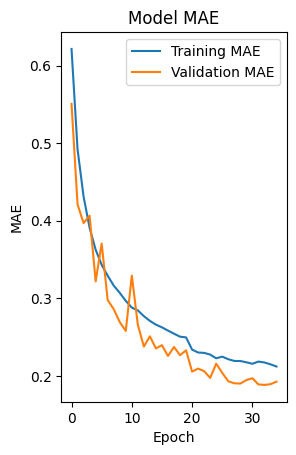

In [38]:
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.show()

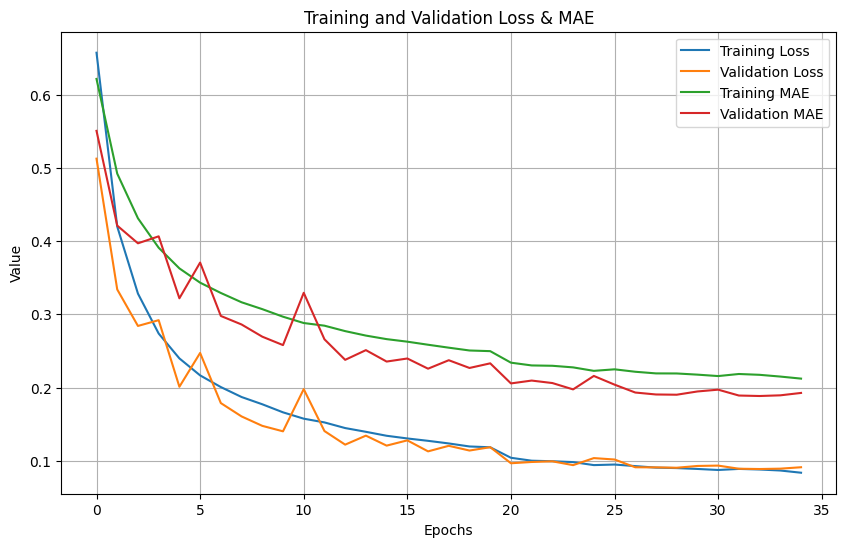

In [39]:
 # Plot Loss and RMSE
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation Loss & MAE')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
preds = model.predict(X_test)

y_test_orig = scaler_y.inverse_transform(y_test)
preds_orig = scaler_y.inverse_transform(preds)

rmse = np.sqrt(mean_squared_error(y_test_orig, preds_orig))
r2 = r2_score(y_test_orig, preds_orig)
print(f"Test RMSE: {rmse:.2f} mmHg")
print(f"R-squared: {r2:.4f}")

1203/1203 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step
Test RMSE: 4.04 mmHg
R-squared: 0.9108


In [42]:
# prompt: lets save the model

# Save the trained model
model.save('blood_pressure_model.h5')
print("Model saved to blood_pressure_model.h5")

Model saved to blood_pressure_model.h5


In [43]:
# Save model in .h5
model.save("model_with_attention.h5")


In [27]:
model.save('CNN_LSTM_Model_256.h5')

In [28]:
from IPython.display import FileLink
FileLink('CNN_LSTM_Model_256.h5')

/content/CNN_LSTM_Model_256.h5

In [29]:
import pickle

In [ ]:
with open('/kaggle/working/scaler_X.pkl', 'wb') as f:
    pickle.dump(scaler_X, f)

with open('/kaggle/working/scaler_y.pkl', 'wb') as f:
    pickle.dump(scaler_y, f)